In [41]:
import cv2
import matplotlib.pyplot as plt
import os

def process_img(path, width, height):
    img = cv2.imread(path)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized_img = cv2.resize(rgb_img, (width, height))
    final_img = resized_img / 255
    return final_img

In [31]:
X, y = [], []

In [42]:
folders = ['original_data/gepetto/', 'original_data/kuki/']
X, y = [], []
i = 0
for folder in folders:
    for filename in os.listdir(folder):
        path = folder + filename
        print(path)
        X.append(process_img(folder+filename, 299, 299))
        y.append(i)
    i += 1
        
        

original_data/gepetto/0692AA9A-60C3-4C10-9FE5-ED6E49AF9230.jpg
original_data/gepetto/06B3E0FC-AFA6-4F3D-82B0-60BE711E3466.jpg
original_data/gepetto/0C75A02E-DDAE-4D79-AB83-9C522DDDD150.jpg
original_data/gepetto/0D3360C0-5B33-4FD3-A47A-77C4043A81DA.jpg
original_data/gepetto/1279E0CB-C426-45EF-93AA-4CCD4CB1090F.jpg
original_data/gepetto/161CAF43-CDD6-4064-B74A-BDA614E8DBD6.jpg
original_data/gepetto/1FC2BB5A-CEF2-495C-9088-CAB6E50FDABD.jpg
original_data/gepetto/24F13A7F-1859-4B20-95E1-5E26C2E3D471.JPG
original_data/gepetto/29867F02-4BD2-4029-AEE3-C27B4FDB3B65.jpg
original_data/gepetto/2A7C72E6-1036-4372-8C4B-897857C2C37B.jpg
original_data/gepetto/31fc4a5d-c817-47e0-934c-3ff4903acba4.jpg
original_data/gepetto/3A03AA1E-F6DD-4FA4-AB59-C27CCF5805CE.jpg
original_data/gepetto/3becbf59-c6f2-41f3-a518-c0d9f7219ea4.jpg
original_data/gepetto/65055C0C-BA82-4777-81C2-CB8B9E6AF5D7.jpg
original_data/gepetto/7B28BC07-495F-45E6-BEBD-B783845F4650.jpg
original_data/gepetto/8642D8DE-3D14-48B1-A994-2AB8FD4C2

original_data/kuki/AE56240C-F88B-41F4-8309-5D2B61E072EF.jpg
original_data/kuki/BB034089-8DC8-43CA-9FB7-797E51C4EB32.jpg
original_data/kuki/C47C9C31-7BF7-470E-9E6F-361D9EA51EBD.jpg
original_data/kuki/C7505861-BD22-443D-97B5-2213E6D8AA11.jpg
original_data/kuki/CDCD6366-03B5-421F-A8DF-73918BCFCD82.jpg
original_data/kuki/D66572D2-46DD-4C28-BF70-64E4B84E8649.jpg
original_data/kuki/EC6B9B4D-360D-473D-BC98-4A3A54C9C75B.jpg
original_data/kuki/ed3e2979-2380-4ad8-b7f5-cea106d2ddef.jpg
original_data/kuki/EFDF86B9-F38F-4A52-BD4B-36921AB5C20B.jpg
original_data/kuki/F21E78E2-7473-444B-98D2-D4EA92857D48.jpg
original_data/kuki/Imagem100.jpg
original_data/kuki/Imagem11.jpg
original_data/kuki/Imagem14.jpg
original_data/kuki/Imagem16.jpg
original_data/kuki/Imagem17.jpg
original_data/kuki/Imagem2.jpg
original_data/kuki/Imagem4.jpg
original_data/kuki/Imagem5.jpg
original_data/kuki/Imagem9.jpg
original_data/kuki/IMG_0149.JPG
original_data/kuki/IMG_0284.JPG
original_data/kuki/IMG_0285.JPG
original_data/kuki/

In [61]:
from keras.preprocessing import image                  

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

Using TensorFlow backend.


In [63]:
img = image.load_img('original_data/gepetto/Imagem1.jpg', target_size=(224, 224))

ImportError: Could not import PIL.Image. The use of `array_to_img` requires PIL.

In [62]:
a = path_to_tensor('original_data/gepetto/Imagem1.jpg')


ImportError: Could not import PIL.Image. The use of `array_to_img` requires PIL.

In [60]:
np.save('test_file', xx)

In [59]:
xx[11].shape

(299, 299, 3)

In [66]:
import numpy as np

xx = np.asarray(X)
yy = np.asarray(y)

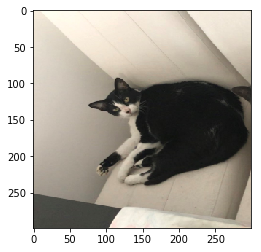

In [26]:
i = process_img('original_data/gepetto/Imagem1.jpg', 299, 299)
plt.imshow(i)
plt.show()

In [23]:
final_img.shape

(250, 250, 3)

In [ ]:
cvs.imread('Data/')
resized_image = cv2.resize(image, (100, 50)) 


In [3]:
import os

In [7]:
for filename in os.listdir('original_data/gepetto'):
    print(filename)
    img = cv2.imread(human_files[3])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


0692AA9A-60C3-4C10-9FE5-ED6E49AF9230.jpg
06B3E0FC-AFA6-4F3D-82B0-60BE711E3466.jpg
0C75A02E-DDAE-4D79-AB83-9C522DDDD150.jpg
0D3360C0-5B33-4FD3-A47A-77C4043A81DA.jpg
1279E0CB-C426-45EF-93AA-4CCD4CB1090F.jpg
161CAF43-CDD6-4064-B74A-BDA614E8DBD6.jpg
1FC2BB5A-CEF2-495C-9088-CAB6E50FDABD.jpg
24F13A7F-1859-4B20-95E1-5E26C2E3D471.JPG
29867F02-4BD2-4029-AEE3-C27B4FDB3B65.jpg
2A7C72E6-1036-4372-8C4B-897857C2C37B.jpg
31fc4a5d-c817-47e0-934c-3ff4903acba4.jpg
3A03AA1E-F6DD-4FA4-AB59-C27CCF5805CE.jpg
3becbf59-c6f2-41f3-a518-c0d9f7219ea4.jpg
65055C0C-BA82-4777-81C2-CB8B9E6AF5D7.jpg
7B28BC07-495F-45E6-BEBD-B783845F4650.jpg
8642D8DE-3D14-48B1-A994-2AB8FD4C2277.jpg
89B239DD-6687-45A0-9359-E5D0D09DE5FC.jpg
8ec8ed9c-01f0-466d-97c3-f33310e21025.jpg
9B743146-A2EB-46E6-B627-5AA070D6FD8C.jpg
A4579331-8AE4-426D-AD55-14D8997C135B.JPG
a5d8b34a-3181-4388-b185-9d17feb439c6.jpg
a9f48993-7f74-4c17-9626-0baed049c641.jpg
AA264FFA-7931-4874-B513-4BAB35A62DCC.jpg
ac4d0222-2e74-4c46-98ba-b3dd2f68c1d5.jpg
AED43509-C142-45

In [77]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(299,299,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(GlobalAveragePooling2D())
model.add(Dense(2, activation='relu'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 299, 299, 16)      208       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 149, 149, 32)      2080      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 2,354
Trainable params: 2,354
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

ValueError: Unknown loss function:binary_crossentropy 

In [79]:
from keras.utils import to_categorical
y = to_categorical(yy)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [83]:
train_X = xx[0:300]
validation_X = xx[300:]

train_y = y[0:300]
validation_y = y[300:]

In [86]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 3

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_X, train_y, 
          validation_data=(validation_X, validation_y),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 300 samples, validate on 83 samples
Epoch 1/3
300/300 [==============================] - 22s 75ms/step - loss: 10.1544 - acc: 0.3700 - val_loss: 1.1921e-07 - val_acc: 1.0000

Epoch 00001: val_loss improved from inf to 0.00000, saving model to saved_models/weights.best.from_scratch.hdf5


OSError: Unable to create file (unable to open file: name = 'saved_models/weights.best.from_scratch.hdf5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 242)